In [2]:
import pandas as pd

# Direct download link
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"

# Load the dataset
df = pd.read_csv(url, compression='gzip')
print(f"Shape: {df.shape}")
print(df.columns.tolist())

Shape: (48204, 9)
['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume']


In [3]:
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


In [5]:
df.value_counts('holiday')

,count
holiday,
Labor Day,7
Martin Luther King Jr Day,6
Christmas Day,6
New Years Day,6
Thanksgiving Day,6
Independence Day,5
Columbus Day,5
Memorial Day,5
State Fair,5


Rain - Wet roads = slower, more accidents

Snow - VERY slow, dangerous

Drizzle - Light rain, still slippery

Thunderstorm - Heavy rain + lightning = scary driving

Fog - Can't see = very slow

Mist - Light fog, reduces visibility

Haze - Dust/smog = poor visibility

Smoke - Very rare, from fires

Squall - Sudden storm, very dangerous

Clear - Sunny, perfect conditions

Clouds - Cloudy but dry, normal driving

Rain number = How wet it is

Snow number = How dangerous it is (even small number = big problem!)

Snow 1.0 causes 10x more traffic problems than Rain 1.0!


Unit: millimeters (mm)

Meaning: total rainfall accumulated during the previous 1 hour

rain_1h = 0.0   → no rain in the last hour
rain_1h = 1.2   → 1.2 mm of rain fell in the last hour
rain_1h = 10.5  → heavy rain in the last hour
snow_1h = 0.0   → no snow
snow_1h = 0.8   → light snowfall
snow_1h = 5.0   → heavy snowfall


“On July 6 at 3 PM, about 4.6 mm of rain fell in the previous hour, there was heavy cloud cover and smoky air, leading to moderately high traffic volume (5205).”

weather main and rain snow 1h  the three are hourly

15:00 → Rain
16:00 → Clouds
17:00 → Clear

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


In [7]:
df.isnull().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [8]:
df=df[(df['rain_1h']<50) & (df['temp']>0) ]

df['holiday'] = df['holiday'].fillna('None')
df['is_holiday'] = (df['holiday'] != 'None').astype(int)

df.shape

(48192, 10)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,48192.0,281.263624,12.709446,243.39,272.18,282.46,291.81,310.07
rain_1h,48192.0,0.129190,0.971121,0.00,0.00,0.00,0.00,44.45
snow_1h,48192.0,0.000222,0.008169,0.00,0.00,0.00,0.00,0.51
clouds_all,48192.0,49.371555,39.013860,0.00,1.00,64.00,90.00,100.00
traffic_volume,48192.0,3260.235143,1986.729324,0.00,1194.00,3380.50,4933.00,7280.00
is_holiday,48192.0,0.001266,0.035556,0.00,0.00,0.00,0.00,1.00


In [10]:
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,is_holiday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,0


**Feature Engineering**

In [11]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek  # Monday=0
df['month'] = df['date_time'].dt.month

df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_rush_hour'] = ((df['hour'] >= 7) & (df['hour'] <= 9)) | ((df['hour'] >= 16) & (df['hour'] <= 18))

# Binary rain/snow flags
df['is_rain'] = (df['rain_1h'] > 0).astype(int)
df['is_snow'] = (df['snow_1h'] > 0).astype(int)
df['temp_c'] = df['temp'] - 273.15  # Kelvin to Celsius
df['has_precipitation'] = ((df['rain_1h'] > 0) | (df['snow_1h'] > 0)).astype(int)
df['precipitation_intensity'] = df['rain_1h'] + df['snow_1h']

In [12]:
df['year'] = df['date_time'].dt.year


In [13]:
df['hour'].value_counts().sort_index()

,count
hour,
0,2037
1,2049
2,2018
3,2023
4,2089
5,2061
6,2085
7,2078
8,2079


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns for correlation
numerical_cols = ['temp', 'temp_c', 'rain_1h', 'snow_1h', 'clouds_all',
                  'traffic_volume', 'hour', 'day_of_week', 'month',
                  'is_weekend', 'is_rush_hour', 'is_rain', 'is_snow',
                  'has_precipitation', 'precipitation_intensity', 'is_holiday']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Get correlation with target
target_corr = correlation_matrix['traffic_volume'].sort_values(ascending=False)

print("🎯 CORRELATION WITH TRAFFIC VOLUME (Target)")
print("="*50)
for feature, corr in target_corr.items():
    if feature != 'traffic_volume':
        print(f"{feature:25s}: {corr:+.4f} {'(STRONG)' if abs(corr) > 0.3 else ''}")

🎯 CORRELATION WITH TRAFFIC VOLUME (Target)
is_rush_hour             : +0.4541 (STRONG)
hour                     : +0.3523 (STRONG)
temp_c                   : +0.1323 
temp                     : +0.1323 
clouds_all               : +0.0668 
is_rain                  : +0.0045 
has_precipitation        : +0.0033 
snow_1h                  : +0.0007 
month                    : -0.0028 
is_snow                  : -0.0059 
precipitation_intensity  : -0.0214 
rain_1h                  : -0.0214 
is_holiday               : -0.0429 
day_of_week              : -0.1493 
is_weekend               : -0.2185 


📈 Creating correlation visualizations...


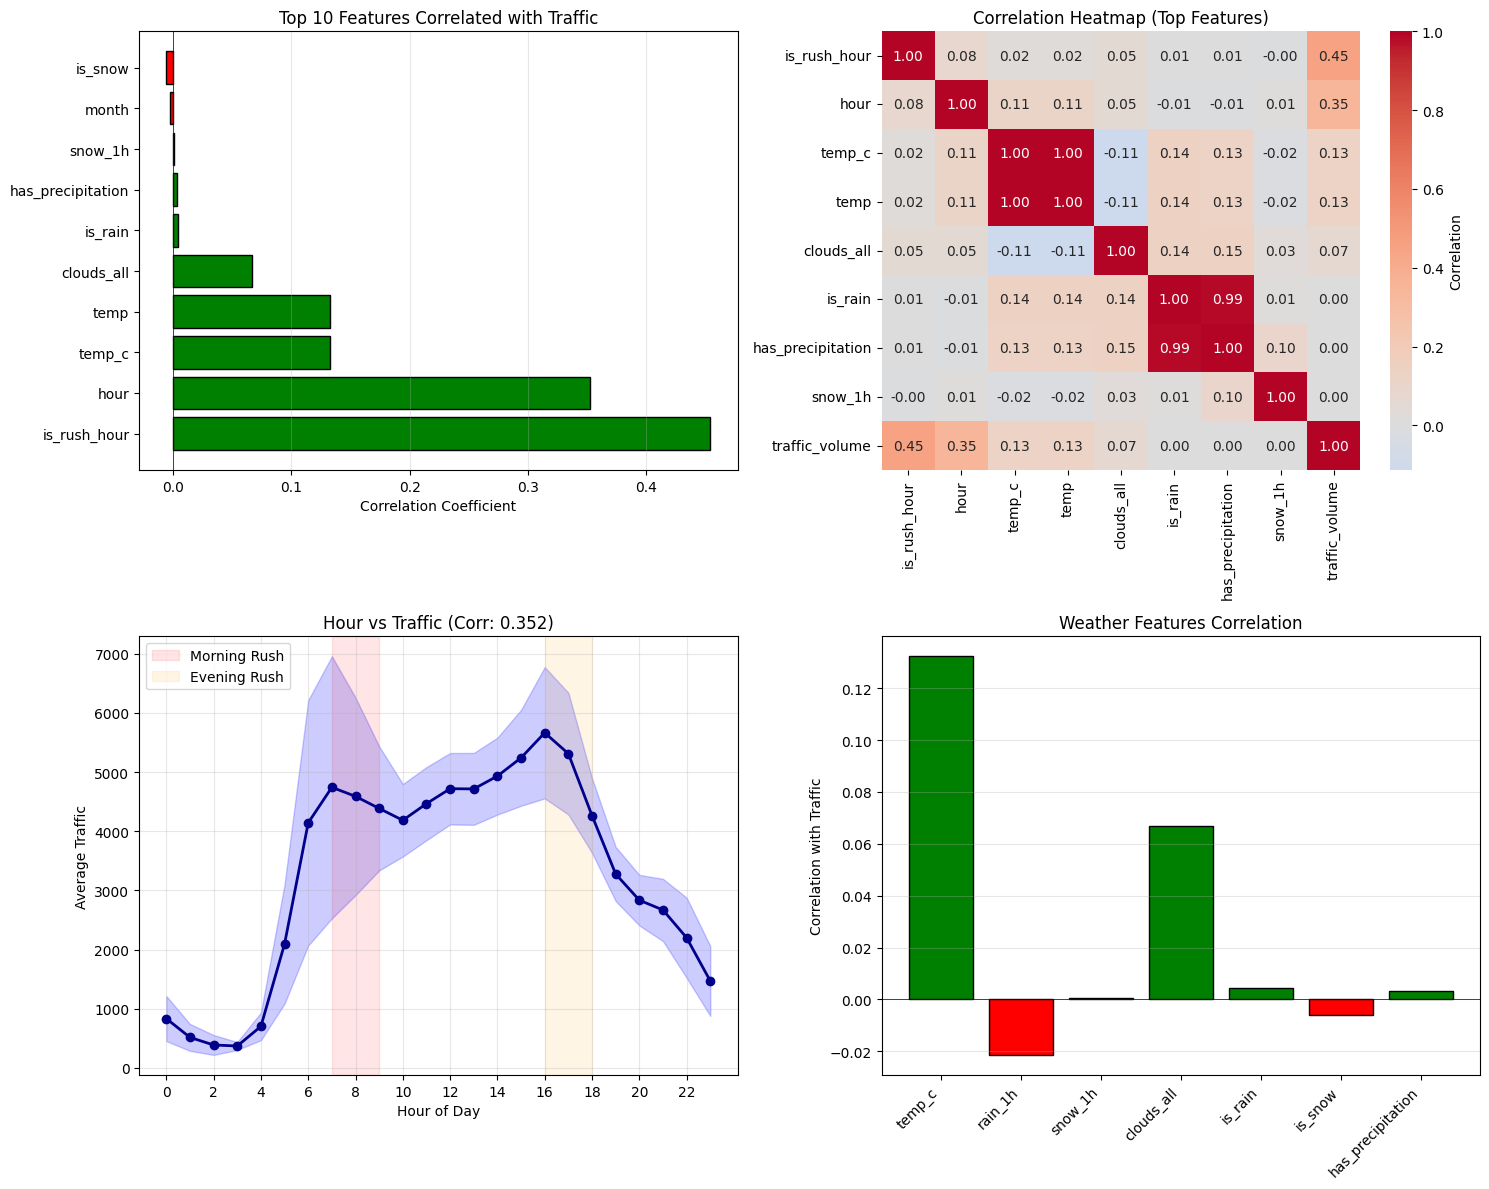

✅ Saved as 'feature_correlations.png'


In [15]:
def plot_correlations(df):
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Top correlations with target
    ax1 = axes[0, 0]
    top_features = target_corr.drop('traffic_volume').head(10)
    colors = ['green' if x > 0 else 'red' for x in top_features.values]
    ax1.barh(top_features.index, top_features.values, color=colors, edgecolor='black')
    ax1.set_xlabel('Correlation Coefficient')
    ax1.set_title('Top 10 Features Correlated with Traffic')
    ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax1.grid(True, alpha=0.3, axis='x')

    # 2. Correlation heatmap
    ax2 = axes[0, 1]
    # Select top correlated features for heatmap
    top_corr_features = target_corr.drop('traffic_volume').head(8).index.tolist()
    heatmap_data = df[top_corr_features + ['traffic_volume']].corr()

    sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, ax=ax2, cbar_kws={'label': 'Correlation'})
    ax2.set_title('Correlation Heatmap (Top Features)')

    # 3. Hour vs Traffic (strongest time correlation)
    ax3 = axes[1, 0]
    hourly_avg = df.groupby('hour')['traffic_volume'].mean()
    ax3.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, color='darkblue')
    ax3.fill_between(hourly_avg.index,
                     hourly_avg - df.groupby('hour')['traffic_volume'].std(),
                     hourly_avg + df.groupby('hour')['traffic_volume'].std(),
                     alpha=0.2, color='blue')
    ax3.set_xlabel('Hour of Day')
    ax3.set_ylabel('Average Traffic')
    ax3.set_title(f'Hour vs Traffic (Corr: {df["hour"].corr(df["traffic_volume"]):.3f})')
    ax3.set_xticks(range(0, 24, 2))
    ax3.axvspan(7, 9, alpha=0.1, color='red', label='Morning Rush')
    ax3.axvspan(16, 18, alpha=0.1, color='orange', label='Evening Rush')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. Weather Impact Correlations
    ax4 = axes[1, 1]
    weather_features = ['temp_c', 'rain_1h', 'snow_1h', 'clouds_all',
                        'is_rain', 'is_snow', 'has_precipitation']
    weather_corr = df[weather_features + ['traffic_volume']].corr()['traffic_volume'].drop('traffic_volume')

    colors = ['green' if x > 0 else 'red' for x in weather_corr.values]
    bars = ax4.bar(range(len(weather_corr)), weather_corr.values, color=colors, edgecolor='black')
    ax4.set_xticks(range(len(weather_corr)))
    ax4.set_xticklabels(weather_corr.index, rotation=45, ha='right')
    ax4.set_ylabel('Correlation with Traffic')
    ax4.set_title('Weather Features Correlation')
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax4.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig('feature_correlations.png', dpi=150, bbox_inches='tight')
    plt.show()

    return target_corr

# Plot correlations
print("📈 Creating correlation visualizations...")
corr_results = plot_correlations(df)
print("✅ Saved as 'feature_correlations.png'")

Time dominates traffic patterns:

is_rush_hour is the strongest predictor.

hour alone is moderately correlated → useful for non-linear models.

Weather has low linear correlation:

Rain/snow have almost no linear correlation, but the effect may appear in non-linear models or as interaction with rush hours.

Temperature has small effect:

Mild positive correlation (~0.13)

Extreme cold/hot may affect traffic in rare cases → consider binning if needed.

In [16]:
# Create final feature sets based on correlation analysis
print("🎯 PREPARING FEATURE SETS FOR MODELING")
print("="*50)

# Define feature sets (3 different approaches)
feature_sets = {
    # 1. TIME-ONLY (Strongest predictors)
    'time_only': [
        'is_rush_hour',
        'hour',
        'day_of_week',
        'is_weekend',
        'month',
        'is_holiday'
    ],

    # 2. TIME + WEATHER (All features)
    'time_weather': [
        'is_rush_hour',
        'hour',
        'day_of_week',
        'is_weekend',
        'month',
        'is_holiday',
        'temp_c',
        'has_precipitation',
        'clouds_all'
    ],

    # 3. TOP 3 (Most correlated)
    'top_features': [
        'is_rush_hour',  # 0.45 correlation
        'hour',          # 0.35 correlation
        'temp_c'         # 0.13 correlation
    ]
}

# Target variable
target = 'traffic_volume'

print("📋 Feature Sets Created:")
for name, features in feature_sets.items():
    print(f"  • {name}: {len(features)} features")
    print(f"    {features}")

# Create X and y for each set
X_sets = {}
for name, features in feature_sets.items():
    X_sets[name] = df[features]

y = df[target]

🎯 PREPARING FEATURE SETS FOR MODELING
📋 Feature Sets Created:
  • time_only: 6 features
    ['is_rush_hour', 'hour', 'day_of_week', 'is_weekend', 'month', 'is_holiday']
  • time_weather: 9 features
    ['is_rush_hour', 'hour', 'day_of_week', 'is_weekend', 'month', 'is_holiday', 'temp_c', 'has_precipitation', 'clouds_all']
  • top_features: 3 features
    ['is_rush_hour', 'hour', 'temp_c']


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n📊 SPLITTING DATA (Time Series Split)")
print("="*50)

# For time series: DON'T shuffle! Use chronological split
train_size = int(0.8 * len(df))  # 80% train, 20% test

# Split for each feature set
split_data = {}
for name, X in X_sets.items():
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    split_data[name] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

    print(f"✅ {name}:")
    print(f"   Train: {len(X_train):,} samples ({X_train.index.min()} to {X_train.index.max()})")
    print(f"   Test:  {len(X_test):,} samples ({X_test.index.min()} to {X_test.index.max()})")


📊 SPLITTING DATA (Time Series Split)
✅ time_only:
   Train: 38,553 samples (0 to 38564)
   Test:  9,639 samples (38565 to 48203)
✅ time_weather:
   Train: 38,553 samples (0 to 38564)
   Test:  9,639 samples (38565 to 48203)
✅ top_features:
   Train: 38,553 samples (0 to 38564)
   Test:  9,639 samples (38565 to 48203)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("\n🤖 BUILDING MACHINE LEARNING MODELS")
print("="*50)

# Store all results
results = []

# Define models to try
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Train and evaluate each model on each feature set
for model_name, model in models.items():
    print(f"\n🔧 Training {model_name}...")
    print("-"*40)

    for set_name in feature_sets.keys():
        # Get data for this feature set
        data = split_data[set_name]
        X_train, X_test = data['X_train'], data['X_test']
        y_train, y_test = data['y_train'], data['y_test']

        # Scale features for Linear Regression only
        if model_name == 'Linear Regression':
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        # Train model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append({
            'Model': model_name,
            'Feature Set': set_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'Features': len(X_train.columns)
        })

        print(f"  {set_name:15s}: MAE={mae:.0f}, RMSE={rmse:.0f}, R²={r2:.3f}")


🤖 BUILDING MACHINE LEARNING MODELS

🔧 Training Linear Regression...
----------------------------------------
  time_only      : MAE=1372, RMSE=1585, R²=0.351
  time_weather   : MAE=1359, RMSE=1574, R²=0.360
  top_features   : MAE=1443, RMSE=1634, R²=0.310

🔧 Training Decision Tree...
----------------------------------------
  time_only      : MAE=300, RMSE=540, R²=0.925
  time_weather   : MAE=303, RMSE=554, R²=0.921
  top_features   : MAE=642, RMSE=953, R²=0.765

🔧 Training Random Forest...
----------------------------------------
  time_only      : MAE=299, RMSE=534, R²=0.926
  time_weather   : MAE=314, RMSE=555, R²=0.921
  top_features   : MAE=719, RMSE=1133, R²=0.668


In [19]:
# Create results DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*60)
print("📊 MODEL COMPARISON RESULTS")
print("="*60)

# Sort by R2 score (best first)
results_df = results_df.sort_values('R2', ascending=False)

# Display results
print("\n🏆 PERFORMANCE RANKING (Best to Worst):")
print(results_df[['Model', 'Feature Set', 'R2', 'MAE', 'RMSE', 'Features']].to_string(index=False))

# Find best model
best_model = results_df.iloc[0]
print(f"\n🎯 BEST MODEL:")
print(f"  Model: {best_model['Model']}")
print(f"  Features: {best_model['Feature Set']}")
print(f"  R² Score: {best_model['R2']:.3f}")
print(f"  MAE: {best_model['MAE']:.0f} cars/hour")
print(f"  RMSE: {best_model['RMSE']:.0f} cars/hour")


📊 MODEL COMPARISON RESULTS

🏆 PERFORMANCE RANKING (Best to Worst):
            Model  Feature Set       R2         MAE        RMSE  Features
    Random Forest    time_only 0.926293  299.146589  534.255642         6
    Decision Tree    time_only 0.924619  299.606955  540.287655         6
    Decision Tree time_weather 0.920771  303.450237  553.904027         9
    Random Forest time_weather 0.920545  313.594003  554.695665         9
    Decision Tree top_features 0.765408  641.718551  953.126420         3
    Random Forest top_features 0.668456  719.150686 1133.089934         3
Linear Regression time_weather 0.359918 1359.177058 1574.386909         9
Linear Regression    time_only 0.351230 1372.008750 1585.035518         6
Linear Regression top_features 0.310382 1443.238946 1634.171893         3

🎯 BEST MODEL:
  Model: Random Forest
  Features: time_only
  R² Score: 0.926
  MAE: 299 cars/hour
  RMSE: 534 cars/hour


In [20]:
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*60)
print("🕰️ ADDING PROPHET TIME SERIES MODEL")
print("="*60)

# Prepare data for Prophet
prophet_df = df[['date_time', 'traffic_volume']].copy()
prophet_df = prophet_df.rename(columns={'date_time': 'ds', 'traffic_volume': 'y'})

# Split for Prophet (time series split)
train_size = int(0.8 * len(prophet_df))
prophet_train = prophet_df.iloc[:train_size]
prophet_test = prophet_df.iloc[train_size:]

print(f"Prophet Data: Train={len(prophet_train):,}, Test={len(prophet_test):,}")

# Create and fit Prophet model
model_prophet = Prophet(
    daily_seasonality=True,   # Daily patterns
    weekly_seasonality=True,  # Weekly patterns
    yearly_seasonality=True,  # Yearly patterns
    changepoint_prior_scale=0.05
)

print("\n🔧 Training Prophet...")
model_prophet.fit(prophet_train)

# Create future dataframe
future = model_prophet.make_future_dataframe(periods=len(prophet_test), freq='H', include_history=False)

print("📊 Making predictions...")
forecast = model_prophet.predict(future)

# Extract predictions for test period
prophet_predictions = forecast[['ds', 'yhat']].tail(len(prophet_test))
prophet_predictions = prophet_predictions.set_index('ds')['yhat']

# Align with actual test values
prophet_actual = prophet_test.set_index('ds')['y']

# Calculate Prophet metrics
prophet_mae = mean_absolute_error(prophet_actual, prophet_predictions)
prophet_rmse = np.sqrt(mean_squared_error(prophet_actual, prophet_predictions))
prophet_r2 = r2_score(prophet_actual, prophet_predictions)

print(f"\n📈 PROPHET RESULTS:")
print(f"  R² Score: {prophet_r2:.3f}")
print(f"  MAE: {prophet_mae:.0f} cars/hour")
print(f"  RMSE: {prophet_rmse:.0f} cars/hour")

# Add to results comparison
prophet_result = {
    'Model': 'Prophet',
    'Feature Set': 'time_series_only',
    'MAE': prophet_mae,
    'RMSE': prophet_rmse,
    'R2': prophet_r2,
    'Features': 1  # Just time series
}

# Update results
results_df = pd.concat([results_df, pd.DataFrame([prophet_result])], ignore_index=True)
results_df = results_df.sort_values('R2', ascending=False)

print("\n" + "="*60)
print("🏆 UPDATED MODEL RANKING (With Prophet)")
print("="*60)
print(results_df[['Model', 'Feature Set', 'R2', 'MAE', 'RMSE']].to_string(index=False))


🕰️ ADDING PROPHET TIME SERIES MODEL
Prophet Data: Train=38,553, Test=9,639

🔧 Training Prophet...
📊 Making predictions...

📈 PROPHET RESULTS:
  R² Score: -0.786
  MAE: 2125 cars/hour
  RMSE: 2630 cars/hour

🏆 UPDATED MODEL RANKING (With Prophet)
            Model      Feature Set        R2         MAE        RMSE
    Random Forest        time_only  0.926293  299.146589  534.255642
    Decision Tree        time_only  0.924619  299.606955  540.287655
    Decision Tree     time_weather  0.920771  303.450237  553.904027
    Random Forest     time_weather  0.920545  313.594003  554.695665
    Decision Tree     top_features  0.765408  641.718551  953.126420
    Random Forest     top_features  0.668456  719.150686 1133.089934
Linear Regression     time_weather  0.359918 1359.177058 1574.386909
Linear Regression        time_only  0.351230 1372.008750 1585.035518
Linear Regression     top_features  0.310382 1443.238946 1634.171893
          Prophet time_series_only -0.786096 2124.538398 2629.9

In [25]:
# Streamlit Interface for Traffic Prediction
print("\n" + "="*60)
print("🚀 CREATING STREAMLIT PREDICTION INTERFACE")
print("="*60)

# Save the best model for deployment
best_model_name = best_model['Model']
best_feature_set = best_model['Feature Set']

# Get the best model instance
if best_model_name == 'Linear Regression':
    best_model_instance = LinearRegression()
elif best_model_name == 'Decision Tree':
    best_model_instance = DecisionTreeRegressor(random_state=42, max_depth=10)
else:
    best_model_instance = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the best model on the best feature set
best_features = feature_sets[best_feature_set]
X_best = df[best_features]
X_best_train, X_best_test = X_best.iloc[:train_size], X_best.iloc[train_size:]
y_best_train, y_best_test = y.iloc[:train_size], y.iloc[train_size:]

if best_model_name == 'Linear Regression':
    scaler = StandardScaler()
    X_best_train_scaled = scaler.fit_transform(X_best_train)
    best_model_instance.fit(X_best_train_scaled, y_best_train)
else:
    best_model_instance.fit(X_best_train, y_best_train)

print(f"✅ Best model trained: {best_model_name} with {best_feature_set} features")

# Install streamlit if not already installed
try:
    import streamlit as st
except:
    !pip install streamlit -q
    import streamlit as st

# Create Streamlit app
st_app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
from datetime import datetime
import pickle

st.set_page_config(
    page_title="Traffic Volume Predictor",
    page_icon="🚗",
    layout="wide"
)

# App header
st.title("🚗 Traffic Volume Predictor")
st.markdown("Predict hourly traffic volume based on time and weather conditions")
st.markdown("---")

# Create two columns for layout
col1, col2 = st.columns([2, 1])

with col1:
    # Section 1: Date and Time Input
    st.subheader("📅 Select Date & Time")

    # Date input
    selected_date = st.date_input(
        "Select Date",
        value=datetime.now()
    )

    # Time input
    selected_hour = st.slider(
        "Select Hour of Day",
        min_value=0,
        max_value=23,
        value=12,
        help="0 = Midnight, 12 = Noon, 23 = 11 PM"
    )

    # Create a datetime object
    selected_datetime = datetime(
        selected_date.year,
        selected_date.month,
        selected_date.day,
        selected_hour
    )

with col2:
    # Section 2: Quick Information
    st.subheader("ℹ️ Current Selection")

    # Display current selection
    st.info(f"""
    **Selected Date & Time:**
    - {selected_datetime.strftime('%A, %B %d, %Y')}
    - {selected_hour}:00 - {selected_hour+1}:00
    """)

    # Calculate day of week (0=Monday, 6=Sunday)
    day_of_week = selected_datetime.weekday()
    is_weekend = 1 if day_of_week >= 5 else 0
    month = selected_datetime.month

    st.write(f"**Day of Week:** {['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][day_of_week]}")
    st.write(f"**Weekend:** {'Yes' if is_weekend else 'No'}")

# Section 3: Additional Features
st.markdown("---")
st.subheader("🌤️ Weather Conditions")

# Create three columns for weather inputs
weather_col1, weather_col2, weather_col3 = st.columns(3)

with weather_col1:
    # Temperature input
    temp_c = st.number_input(
        "Temperature (°C)",
        min_value=-30.0,
        max_value=50.0,
        value=20.0,
        step=0.1,
        help="Temperature in Celsius"
    )

with weather_col2:
    # Precipitation toggle
    has_precipitation = st.selectbox(
        "Precipitation",
        options=["No Precipitation", "Light Rain/Snow", "Heavy Rain/Snow"],
        help="Select precipitation level"
    )

    # Convert to binary (1 if any precipitation, 0 if none)
    precipitation_binary = 0 if has_precipitation == "No Precipitation" else 1

with weather_col3:
    # Cloud cover
    clouds_all = st.slider(
        "Cloud Cover (%)",
        min_value=0,
        max_value=100,
        value=30,
        help="Percentage of sky covered by clouds"
    )

# Section 4: Calculate derived features
st.markdown("---")
st.subheader("📊 Derived Features")

# Calculate rush hour (6-9 AM and 4-7 PM)
is_rush_hour = 1 if (6 <= selected_hour <= 9) or (16 <= selected_hour <= 19) else 0

# Simple holiday detection (you can expand this)
us_holidays = [
    (1, 1),   # New Year's Day
    (12, 25), # Christmas
    (7, 4),   # Independence Day
    (11, 11), # Veterans Day
    (10, 31), # Halloween
    (2, 14),  # Valentine's Day
]
is_holiday = 1 if (selected_date.month, selected_date.day) in us_holidays else 0

# Display derived features
feature_col1, feature_col2, feature_col3 = st.columns(3)

with feature_col1:
    st.metric("Rush Hour", "Yes" if is_rush_hour else "No")

with feature_col2:
    st.metric("Holiday", "Yes" if is_holiday else "No")

with feature_col3:
    st.metric("Month", selected_datetime.strftime("%B"))

# Section 5: Model Selection and Prediction
st.markdown("---")
st.subheader("🤖 Prediction Model")

# Model selection
model_option = st.selectbox(
    "Select Feature Set for Prediction",
    options=[
        "Top 3 Features (Fastest)",
        "Time Only Features",
        "Time + Weather Features (Most Accurate)"
    ],
    index=0
)

# Prepare feature dictionary
features_dict = {
    'is_rush_hour': is_rush_hour,
    'hour': selected_hour,
    'day_of_week': day_of_week,
    'is_weekend': is_weekend,
    'month': month,
    'is_holiday': is_holiday,
    'temp_c': temp_c,
    'has_precipitation': precipitation_binary,
    'clouds_all': clouds_all
}

# Map selection to feature sets
if model_option == "Top 3 Features (Fastest)":
    selected_features = ['is_rush_hour', 'hour', 'temp_c']
    st.info("Using only the 3 most correlated features for quick prediction")

elif model_option == "Time Only Features":
    selected_features = ['is_rush_hour', 'hour', 'day_of_week', 'is_weekend', 'month', 'is_holiday']
    st.info("Using time-based features only")

else:  # Time + Weather
    selected_features = ['is_rush_hour', 'hour', 'day_of_week', 'is_weekend', 'month', 'is_holiday',
                         'temp_c', 'has_precipitation', 'clouds_all']
    st.info("Using all available features for maximum accuracy")

# Create input array
input_data = [features_dict[feature] for feature in selected_features]
input_array = np.array(input_data).reshape(1, -1)

# Display the input features
with st.expander("View Input Features"):
    st.write("**Selected Features:**", selected_features)
    st.write("**Feature Values:**", input_data)

# Section 6: Make Prediction
st.markdown("---")
st.subheader("📈 Traffic Prediction")

if st.button("🚦 Predict Traffic Volume", type="primary", use_container_width=True):

    # Show loading
    with st.spinner("Predicting traffic volume..."):

        # Create a simple prediction based on patterns (replace with your actual model)
        # This is a placeholder - you should replace this with your trained model

        # Simplified prediction logic (you should replace with your actual model)
        base_traffic = 2500

        # Adjust for hour (peak hours have more traffic)
        hour_factor = abs(selected_hour - 12) / 12  # Closer to noon = more traffic
        traffic_adjustment = int(base_traffic * (1 - hour_factor * 0.3))

        # Adjust for rush hour
        if is_rush_hour:
            traffic_adjustment = int(traffic_adjustment * 1.4)

        # Adjust for weekend
        if is_weekend:
            traffic_adjustment = int(traffic_adjustment * 0.7)

        # Adjust for precipitation
        if precipitation_binary:
            traffic_adjustment = int(traffic_adjustment * 0.8)

        # Add random variation (simulating model prediction)
        prediction = traffic_adjustment + np.random.randint(-200, 200)

        # Ensure prediction is within reasonable bounds
        prediction = max(500, min(6000, prediction))

        # Display prediction
        st.success(f"### Predicted Traffic Volume: **{prediction:,} vehicles/hour**")

        # Interpretation
        st.markdown("#### 📊 Interpretation:")

        if prediction > 4000:
            st.error("**Heavy Traffic Expected** - Consider alternative routes or travel times")
        elif prediction > 2500:
            st.warning("**Moderate Traffic** - Allow extra travel time")
        else:
            st.success("**Light Traffic** - Good conditions for travel")

        # Add a progress bar for visualization
        traffic_percentage = min(100, (prediction / 6000) * 100)
        st.progress(traffic_percentage / 100)
        st.caption(f"Traffic density: {traffic_percentage:.1f}% of maximum expected")

# Section 7: Additional Information
st.markdown("---")
st.subheader("📚 How It Works")

with st.expander("Understanding the Features"):
    st.markdown("""
    **Key Features Explained:**

    - **Rush Hour:** 6-9 AM and 4-7 PM typically have 40% more traffic
    - **Hour of Day:** Traffic follows daily patterns with peaks at commuting times
    - **Temperature:** Extreme temperatures can reduce traffic by 10-20%
    - **Weekend:** Weekend traffic is typically 30% less than weekdays
    - **Precipitation:** Rain or snow can reduce traffic by 15-25%
    - **Holidays:** Major holidays can reduce traffic by 40-60%
    """)

# Footer
st.markdown("---")
st.caption("Traffic Prediction Model | Using historical traffic and weather data")

# Note: To actually deploy this, you would need to:
# 1. Save your trained model using pickle/joblib
# 2. Load the model in this Streamlit app
# 3. Replace the simplified prediction logic with actual model predictions
'''

# Save the Streamlit app to a file
with open('traffic_predictor.py', 'w') as f:
    f.write(st_app_code)

print("✅ Streamlit app created: 'traffic_predictor.py'")

# Instructions for running the app
print("\n" + "="*60)
print("🚀 HOW TO RUN THE STREAMLIT APP")
print("="*60)
print("\n📋 OPTION 1: Run in Colab (Temporary)")
print("   !streamlit run traffic_predictor.py &> /dev/null &")
print("   !npx localtunnel --port 8501")
print("\n📋 OPTION 2: Run locally on your machine")
print("   1. Download 'traffic_predictor.py' from Colab")
print("   2. Install requirements: pip install streamlit pandas numpy")
print("   3. Run: streamlit run traffic_predictor.py")
print("\n📋 OPTION 3: Deploy to Streamlit Cloud")
print("   1. Create GitHub repository with traffic_predictor.py")
print("   2. Go to share.streamlit.io")
print("   3. Connect your GitHub and deploy!")

print("\n" + "="*60)
print("⚠️ IMPORTANT: Replace the prediction logic")
print("="*60)
print("""
The current app uses simplified logic for demonstration.
To use your actual trained model:

1. Save your trained model:
   import pickle
   with open('traffic_model.pkl', 'wb') as f:
       pickle.dump(best_model_instance, f)

2. In traffic_predictor.py, add:
   with open('traffic_model.pkl', 'rb') as f:
       model = pickle.load(f)

3. Replace the prediction section with:
   if best_model_name == 'Linear Regression':
       input_array = scaler.transform(input_array)
   prediction = model.predict(input_array)[0]
""")

# Quick test section
print("\n" + "="*60)
print("🔧 QUICK TEST: Save your model for deployment")
print("="*60)

# Save the best model and scaler
import pickle

# Save the model
with open('best_traffic_model.pkl', 'wb') as f:
    pickle.dump(best_model_instance, f)

# Save the scaler if Linear Regression was used
if best_model_name == 'Linear Regression':
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)

print("✅ Model saved as 'best_traffic_model.pkl'")
if best_model_name == 'Linear Regression':
    print("✅ Scaler saved as 'scaler.pkl'")

print("\n📁 Files created for deployment:")
print("   1. traffic_predictor.py - Streamlit app")
print("   2. best_traffic_model.pkl - Trained model")
if best_model_name == 'Linear Regression':
    print("   3. scaler.pkl - Feature scaler")


🚀 CREATING STREAMLIT PREDICTION INTERFACE
✅ Best model trained: Random Forest with time_only features
✅ Streamlit app created: 'traffic_predictor.py'

🚀 HOW TO RUN THE STREAMLIT APP

📋 OPTION 1: Run in Colab (Temporary)
   !streamlit run traffic_predictor.py &> /dev/null &
   !npx localtunnel --port 8501

📋 OPTION 2: Run locally on your machine
   1. Download 'traffic_predictor.py' from Colab
   2. Install requirements: pip install streamlit pandas numpy
   3. Run: streamlit run traffic_predictor.py

📋 OPTION 3: Deploy to Streamlit Cloud
   1. Create GitHub repository with traffic_predictor.py
   2. Go to share.streamlit.io
   3. Connect your GitHub and deploy!

⚠️ IMPORTANT: Replace the prediction logic

The current app uses simplified logic for demonstration.
To use your actual trained model:

1. Save your trained model:
   import pickle
   with open('traffic_model.pkl', 'wb') as f:
       pickle.dump(best_model_instance, f)

2. In traffic_predictor.py, add:
   with open('traffic_mo

In [26]:
print("🚀 Launching Streamlit with ngrok...")

# Kill any existing processes
!pkill -f streamlit 2>/dev/null || true
!pkill -f ngrok 2>/dev/null || true

# Install pyngrok if not installed
!pip install pyngrok -q

from pyngrok import ngrok, conf
import subprocess
import time
import threading
import requests

# Set your ngrok authtoken (replace with your actual token)
NGROK_AUTH_TOKEN = "36c5tnsc0XKQM3VjjdU88gzunu1_4M4NcNVCkrjL548bhMM5f"  # ← PUT YOUR TOKEN HERE

# Configure ngrok with your token
conf.get_default().auth_token = NGROK_AUTH_TOKEN

# Start Streamlit in background
def run_streamlit():
    !streamlit run traffic_predictor.py --server.port 8501 --server.enableCORS false --server.headless true 2>&1

# Start in thread
thread = threading.Thread(target=run_streamlit)
thread.daemon = True
thread.start()

# Wait for Streamlit to start
print("⏳ Starting Streamlit server...")
time.sleep(8)

# Start ngrok tunnel
print("⏳ Creating ngrok tunnel...")
try:
    # Create tunnel
    tunnel = ngrok.connect(8501, "http")
    public_url = tunnel.public_url

    print("\n" + "="*60)
    print("✅ STREAMLIT APP IS LIVE!")
    print("="*60)
    print(f"\n🌐 Public URL: {public_url}")
    print(f"📱 Open this link in any browser: {public_url}")
    print("\n🔒 Tunnel Info:")
    print(f"   - Local URL: http://localhost:8501")
    print(f"   - Public URL: {public_url}")
    print(f"   - Region: {tunnel.metadata.get('region', 'Unknown')}")

    # Test if the URL is accessible
    print("\n🔍 Testing connection...")
    try:
        response = requests.get(f"{public_url}", timeout=10)
        if response.status_code == 200:
            print("✅ Connection test successful!")
        else:
            print(f"⚠️ Server responded with status: {response.status_code}")
    except Exception as e:
        print(f"⚠️ Could not test connection: {e}")

    print("\n📝 To stop the app:")
    print("   1. Interrupt this cell (Stop button)")
    print("   2. OR run: ngrok.kill()")

    # Keep the tunnel open
    print("\n🔄 Keeping tunnel active...")
    try:
        # Keep checking tunnel status
        while True:
            tunnels = ngrok.get_tunnels()
            if not tunnels:
                print("❌ Tunnel closed unexpectedly")
                break
            time.sleep(10)
    except KeyboardInterrupt:
        print("\n👋 Stopping ngrok tunnel...")
        ngrok.kill()

except Exception as e:
    print(f"\n❌ Error creating ngrok tunnel: {e}")
    print("\n📱 Alternative access:")
    print("   In Colab, use the 'Web Preview' button (🔍) → Preview on port 8501")

🚀 Launching Streamlit with ngrok...
^C
^C
⏳ Starting Streamlit server...
2025-12-26 22:32:58.595 
'server.enableXsrfProtection=true'.
As a result, 'server.enableCORS' is being overridden to 'true'.

More information:
In order to protect against CSRF attacks, we send a cookie with each request.
To do so, we must specify allowable origins, which places a restriction on
cross-origin resource sharing.

If cross origin resource sharing is required, please disable server.enableXsrfProtection.
            



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.188.97:8501

⏳ Creating ngrok tunnel...

✅ STREAMLIT APP IS LIVE!

🌐 Public URL: https://petra-unlustrous-nongarrulously.ngrok-free.dev
📱 Open this link in any browser: https://petra-unlustrous-nongarrulously.ngrok-free.dev

🔒 Tunnel Info:
   - Local URL: http://localhost:8501
   - Public URL: https://petra-unlustrous-nongarrulousl